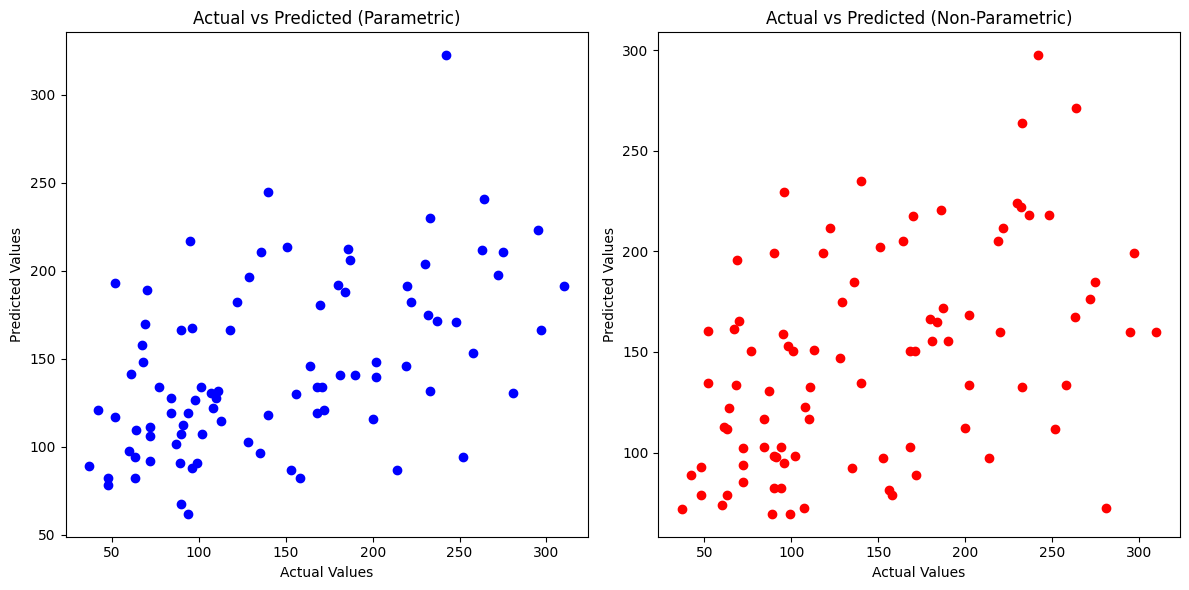

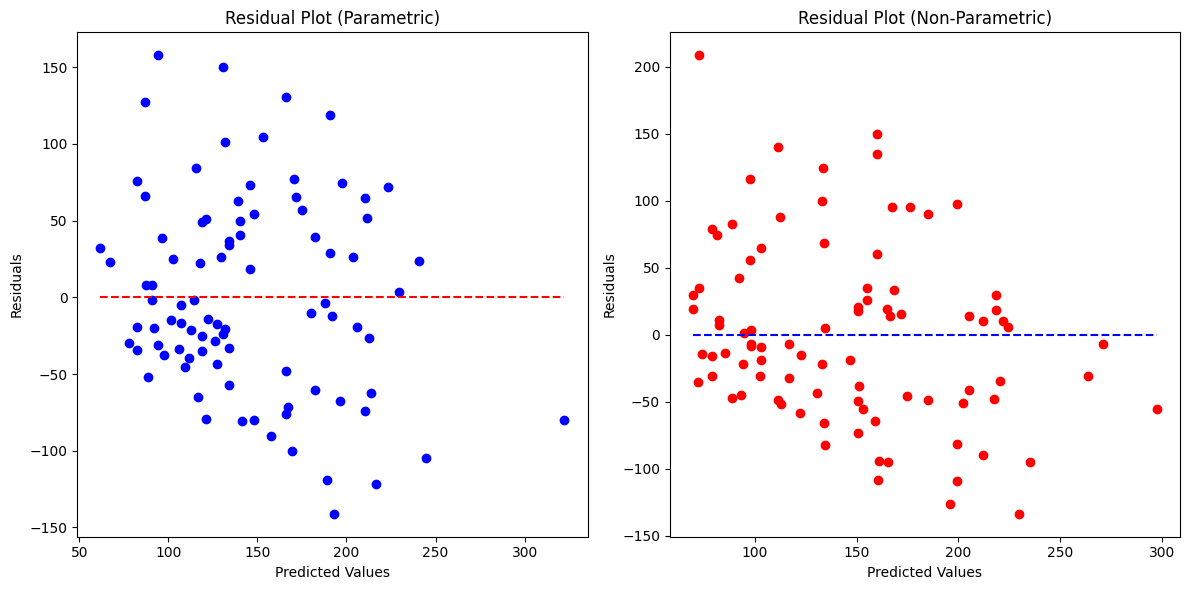

Parametric Regression Results:
Mean Squared Error: 4061.8259284949268
R-squared: 0.23335039815872138

Non-Parametric Regression Results:
Mean Squared Error: 4453.91011235955
R-squared: 0.1593464431050745


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset (a commonly used medical dataset)
diabetes = load_diabetes()
X, y = diabetes.data[:, np.newaxis, 2], diabetes.target  # using only one feature (index 2)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametric Regression (Linear Regression)
parametric_model = LinearRegression()
parametric_model.fit(X_train, y_train)
parametric_predictions = parametric_model.predict(X_test)

# Non-Parametric Regression (K-Nearest Neighbors)
non_parametric_model = KNeighborsRegressor(n_neighbors=5)
non_parametric_model.fit(X_train, y_train)
non_parametric_predictions = non_parametric_model.predict(X_test)

# Visualize the Results - Scatter Plot (Actual vs Predicted)
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted data points (parametric)
plt.subplot(1, 2, 1)
plt.scatter(y_test, parametric_predictions, color='blue')
plt.title('Actual vs Predicted (Parametric)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for actual vs predicted data points (non-parametric)
plt.subplot(1, 2, 2)
plt.scatter(y_test, non_parametric_predictions, color='red')
plt.title('Actual vs Predicted (Non-Parametric)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

# Visualize the Results - Residual Plot
plt.figure(figsize=(12, 6))

# Residual plot for parametric regression
plt.subplot(1, 2, 1)
plt.scatter(parametric_predictions, y_test - parametric_predictions, color='blue')
plt.hlines(y=0, xmin=min(parametric_predictions), xmax=max(parametric_predictions), linestyle='--', color='red')
plt.title('Residual Plot (Parametric)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Residual plot for non-parametric regression
plt.subplot(1, 2, 2)
plt.scatter(non_parametric_predictions, y_test - non_parametric_predictions, color='red')
plt.hlines(y=0, xmin=min(non_parametric_predictions), xmax=max(non_parametric_predictions), linestyle='--', color='blue')
plt.title('Residual Plot (Non-Parametric)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

# Print Regression Results
print("Parametric Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, parametric_predictions))
print("R-squared:", r2_score(y_test, parametric_predictions))

print("\nNon-Parametric Regression Results:")
print("Mean Squared Error:", mean_squared_error(y_test, non_parametric_predictions))
print("R-squared:", r2_score(y_test, non_parametric_predictions))
